NameError: name 'cd' is not defined

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                 2048 / STANDARD FITS FORMAT                           
NAXIS2  =                 4096 / STANDARD FITS FORMAT                           
ORIGIN  = 'Palomar Transient Factory' / Origin of these image data              
CREATOR = 'Infrared Processing and Analysis Center' / Creator of this FITS file 
TELESCOP= 'P48     '           / Name of telescope                              
INSTRUME= 'PTF/MOSAIC'         / Instrument name                                
OBSERVER= 'KulkarniPTF'        / Observer name and project                      
CCDID   = '11      '           / CCD number (0..11)                             
DATE-OBS= '2013-07-02T04:17:23.555' / UTC shutter time YYYY-MM-DDTHH:MM:SS.SSS  
DATE    = '2013-07-01T21:35:

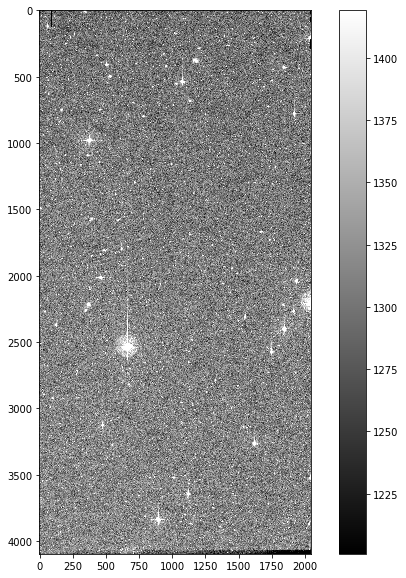

In [107]:
import os 


os.chdir(r"C:\Users\willi\Desktop\Astronomy\ASTR100-2020\Students\Welder")



import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils import DAOStarFinder
from astropy.stats import mad_std
from astropy.coordinates import SkyOffsetFrame, ICRS, SkyCoord
from astroquery.simbad import Simbad
from astropy import coordinates
from astropy import constants as const
from astropy.time import Time
from astropy.table import QTable
from photutils import aperture_photometry, CircularAperture

f=fits.open("PTF_201307021787_i_p_scie_t041723_u016616794_f02_p003486_c11 (1).fits")
data=f[0].data
header=f[0].header


mean=np.mean(data)
sigma=np.std(data)
median=np.median(data)
plt.figure(figsize=(10,10))
plt.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma, cmap='gray')
plt.colorbar()
header['DATE-OBS']
header




#1. all_pix2world performs three transformations in series(core WCS, SIP, and table lookup). wcs_pix2world() only performs the core 
   #WCS transformation
#2The SIP Convention represents geometric distortions with polynomial


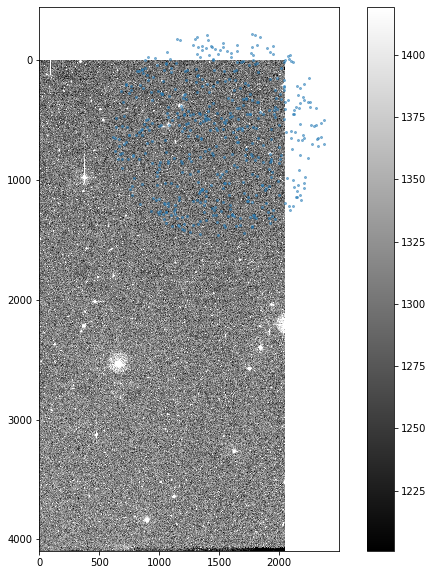

0 1668 1673
1 2539 665
2 3520 1016
3 2040 1938
4 2404 1847
5 2518 667
6 3262 1624
7 966 378
8 2015 467
9 3829 901
10 211 2042
11 2526 668
12 3644 1127
13 1095 369
14 2489 665
15 539 1081
16 255 204
17 3273 552
18 553 1034
19 2533 665
20 2589 667
21 3846 900
22 979 379
23 3638 1126
24 2594 667
25 2556 666
26 997 378
27 217 2041
28 973 379
29 3817 900
30 1004 379
31 2563 665
32 2922 105
33 2388 1847
34 3838 902
35 2475 666
36 2465 666
37 120 66
38 2545 666
39 1796 621
40 2502 666
41 416 510
42 2393 1848
43 2374 132
44 425 957
45 2494 667
46 2102 384
47 407 510
48 1009 379
49 1493 13
50 779 1925
51 1165 316
52 2569 667
53 2578 667
54 2265 1918
55 681 1138
56 1810 491
57 430 1846
58 2875 1263
59 989 379
60 2572 1750
61 223 2042
62 1161 999
63 3269 1624
64 2020 467
65 2583 667
66 726 1726
67 3522 2046
68 289 1207
69 2009 467
70 1386 578
71 2409 1847
72 784 1923
73 960 379
74 3255 1624
75 2482 666
76 1379 1165
77 530 1752
78 2508 667
79 1690 1136
80 204 2042
81 546 1081
82 2537 670
83 2398 1

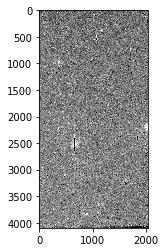

In [146]:
gaia=fits.open("Gaia-data.fits.gz")
datag=gaia[1].data

rag=datag.field(1) #Gaia right ascenscions
decg=datag.field(3) #Gaia declination 
w=wcs.WCS(header)

pixg=w.wcs_world2pix(rag,decg, 0)
xg=pixg[0]
yg=pixg[1]
mean=np.mean(data)
sigma=np.std(data)
median=np.median(data)
plt.figure(figsize=(10,10))
plt.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma, cmap='gray')
plt.colorbar()
plt.scatter(xg,yg,s=4, alpha=0.5)
plt.show()
 



#Comparison to findstar
import math
def findstars(image):
    npad = 5
    nstar = 300
    blankval=-1 
    #initialize output arrays
    xf = np.zeros(nstar).astype('int32')
    yf=np.zeros(nstar).astype('int32')
    flux=np.zeros(nstar)
    image[0:npad,:]=blankval
    image[:,0:npad]=blankval
    image[-npad-1:-1,:]
    image[:,-npad-1:-1]
    
    #loop over stars
    for i in np.arange(nstar):
        indmax = np.argmax(image)
        #y[i]=indmax//sx
        #x[i]=indmax%sx
        yf[i], xf[i]=np.unravel_index(indmax, image.shape)
        flux[i]=image[yf[i],xf[i]]
        print(i, yf[i], xf[i])
        image[yf[i]-npad:yf[i]+npad, xf[i]-npad:xf[i]+npad]=blankval
        
    return xf, yf, flux


datafs=np.copy(data)
findstars(datafs)
xf, yf, flux=findstars(datafs)   
plt.imshow(datafs, vmin=median-.1*sigma, vmax=median+.1*sigma, cmap='gray')


print(flux)

[[9.14850392e+01 1.60867706e+00]
 [8.85531352e+02 9.44433870e-01]
 [2.04551807e+03 1.85093397e+00]
 ...
 [6.66302809e+02 4.08967671e+03]
 [1.30023903e+03 4.08985046e+03]
 [1.24908638e+03 4.09003907e+03]]


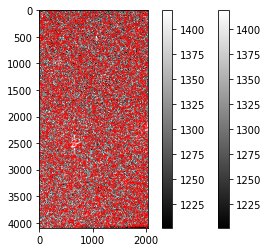

In [111]:
plt.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma, cmap='gray')
plt.colorbar()
bkg_sigma=mad_std(data)
daofind=DAOStarFinder(fwhm=4, threshold= 3.*bkg_sigma)
sources=daofind(data)
sources

positions= np.transpose((sources['xcentroid'], sources['ycentroid'
]))

apertures=CircularAperture(positions, r=4.)
phot_table=aperture_photometry(data, apertures)
phot_table

plt.imshow(data, vmin=median-.1*sigma, vmax=median+.1*sigma, cmap='gray')
plt.colorbar()

apertures.plot(color='red')

print(positions)

In [112]:
print(positions)

[[9.14850392e+01 1.60867706e+00]
 [8.85531352e+02 9.44433870e-01]
 [2.04551807e+03 1.85093397e+00]
 ...
 [6.66302809e+02 4.08967671e+03]
 [1.30023903e+03 4.08985046e+03]
 [1.24908638e+03 4.09003907e+03]]


(0, 2000)

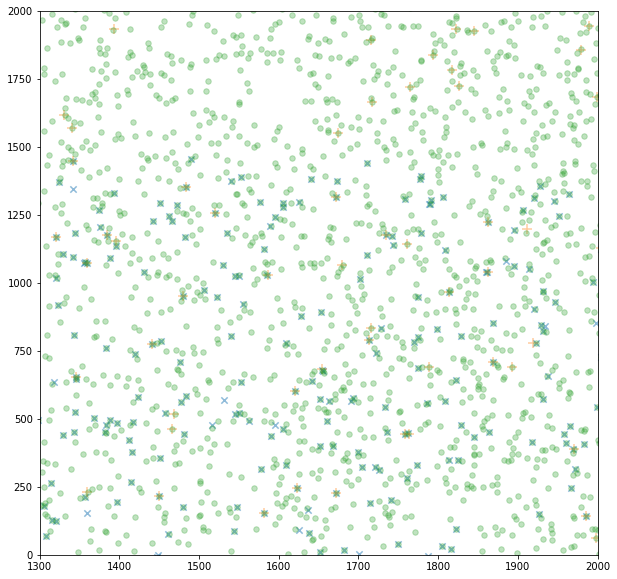

In [156]:

plt.figure(figsize=(10,10))
plt.scatter(xg,yg,s=40, alpha=0.5, marker="x")
plt.scatter(xf,yf,s=100, alpha=0.4, marker='+')
plt.scatter(sources['xcentroid'],sources['ycentroid'],s=30, alpha=0.3)
plt.xlim(1300,2000)
plt.ylim(0,2000)
#Green circles are the DAO locations
#Blue X's are the Gaia locations 



#The Gaia locations coincide with the locations of the DAO and findstar locations. However, there is an excess of DAO locations.
#These are probably not stars. DAO finder may confused other objects or artifacts with stars. 

1494.518694860515 608.8348072682331


NameError: name 'yf' is not defined